#**Loading data**

In [85]:
import pandas as pd
from sklearn import datasets

In [86]:
data = datasets.load_iris()

In [87]:
#creating a dataframe from the loaded set
df = pd.DataFrame(data.data, columns=data.feature_names)

In [88]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [89]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [90]:
#concatenating the dataset with its target
df['target'] = pd.Series(data.target)

In [91]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [92]:
df.shape

(150, 5)

In [93]:
#adding target labels
df['target_name'] = df['target'].replace(dict(enumerate(data.target_names)))

In [94]:
df.shape

(150, 6)

In [95]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [96]:
#checking for nan values
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_name          0
dtype: int64

In [97]:
#checking data types
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
target_name           object
dtype: object

In [98]:
#updating column names
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target', 'target_name']

In [99]:
df

,sepal_length,sepal_width,petal_length,petal_width,target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


#**EDA**

In [100]:
df.describe().round(2)

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20,1.00
std,0.83,0.44,1.77,0.76,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.35,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.40,6.90,2.50,2.00


In [101]:
corr = df.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [102]:
abs(corr['target']).sort_values(ascending=False)

target          1.000000
petal_width     0.956547
petal_length    0.949035
sepal_length    0.782561
sepal_width     0.426658
Name: target, dtype: float64

In [103]:
#checking target counts
df['target_name'].groupby(by=df['target_name']).count()

target_name
setosa        50
versicolor    50
virginica     50
Name: target_name, dtype: int64

In [104]:
import plotly.express as px
figure = px.histogram(df, x='target_name', color='target_name')
figure.update_layout(showlegend=False)
figure.show()

In [105]:
df.columns.to_list()[0:-2]

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [106]:
for i in df.columns.to_list()[0:-2]:
  figure = px.box(df, x='target_name', y=i)
  figure.show()

In [107]:
dummy_df = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
fig = px.scatter_matrix(dummy_df)
fig.update_layout(width=2000, height=800,)
fig.show()

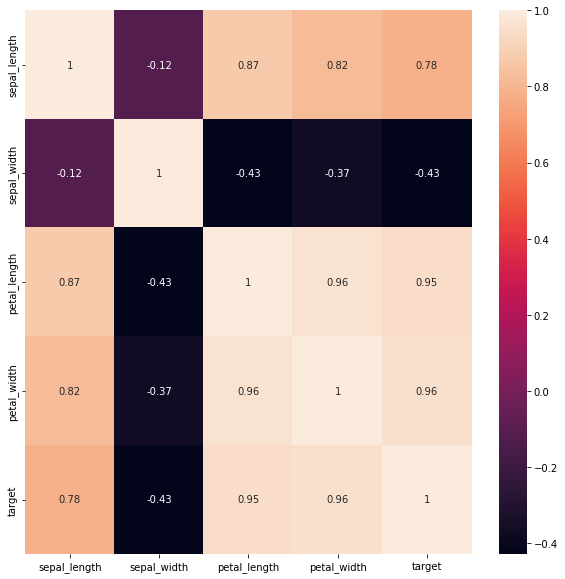

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
cor = df.corr()
sns.heatmap(cor, annot=True)
plt.show()

#**ML Models**

In [109]:
#splitting into x/y
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['target']

In [110]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [111]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

##**Logistic Reg**

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix

In [115]:
logReg = LogisticRegression()
logReg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
predict = logReg.predict(x_test)

In [117]:
conf_matrix = confusion_matrix(y_test, predict)

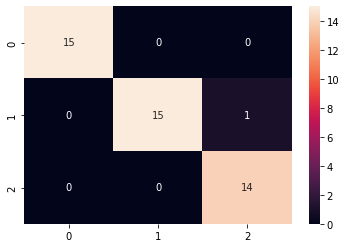

In [118]:
sns.heatmap(conf_matrix, annot=True)

In [119]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        16
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [120]:
print('LogReg score: ', logReg.score(x_test, y_test))

LogReg score:  0.9777777777777777


##**Random Forrest**

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
forrest = RandomForestClassifier()
forrest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [123]:
forr_predict = forrest.predict(x_test)

In [124]:
conf_matrix_2 = confusion_matrix(y_test, forr_predict)

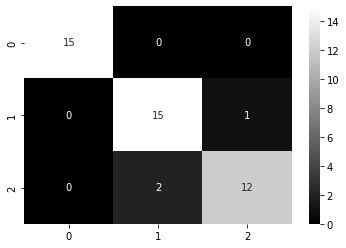

In [125]:
sns.heatmap(conf_matrix_2, annot=True, cmap='gray')

In [126]:
print(classification_report(y_test, forr_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [127]:
print('RandomForrest score: ', forrest.score(x_test, y_test))

RandomForrest score:  0.9333333333333333
